In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
Data=pd.read_csv(r"C:\Users\Avi Chaudhary\Desktop\Advertising.csv")
Data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
Data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
Data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
Data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
Data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
Data.shape

(200, 4)

In [8]:
Data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data visualization


<AxesSubplot:>

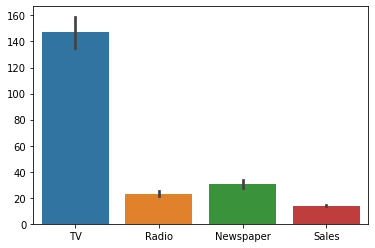

In [9]:
sns.barplot(data=Data)

<AxesSubplot:>

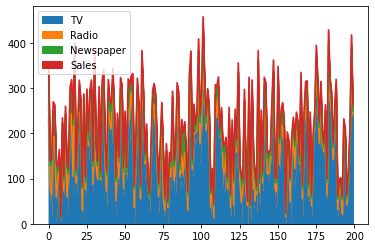

In [10]:
Data.plot.area()

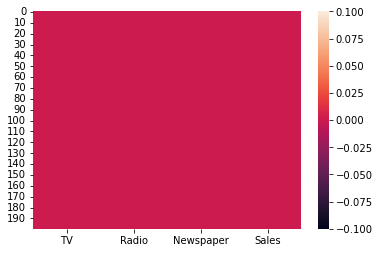

In [11]:
result=sns.heatmap(Data.isnull())


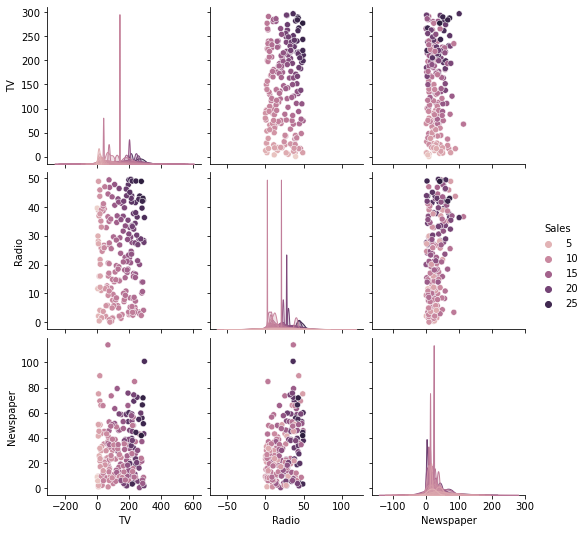

In [12]:
sns.pairplot(data=Data,hue='Sales')
plt.show()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

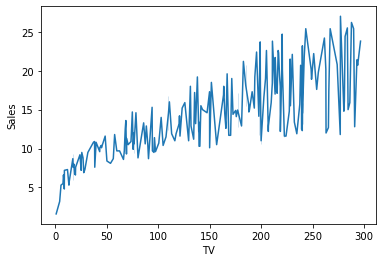

In [13]:
sns.lineplot(x='TV',y='Sales',data=Data)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

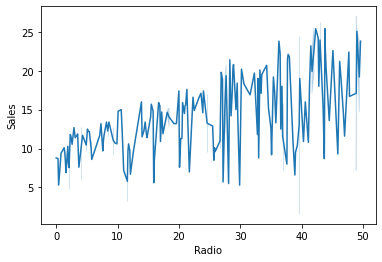

In [14]:
sns.lineplot(x='Radio',y='Sales',data=Data)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

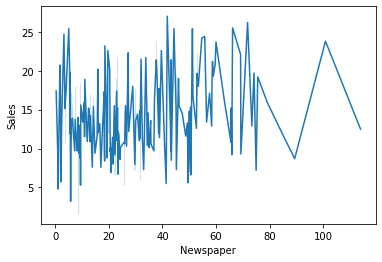

In [15]:
sns.lineplot(x='Newspaper',y='Sales',data=Data)

<AxesSubplot:xlabel='Radio', ylabel='count'>

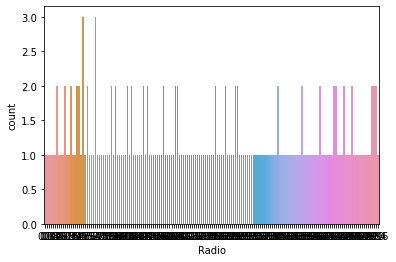

In [16]:
sns.countplot(Data['Radio'])

<AxesSubplot:xlabel='TV', ylabel='count'>

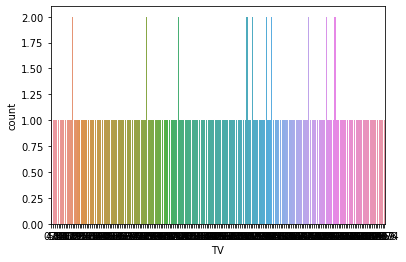

In [17]:
sns.countplot(Data['TV'])

<AxesSubplot:xlabel='Newspaper', ylabel='count'>

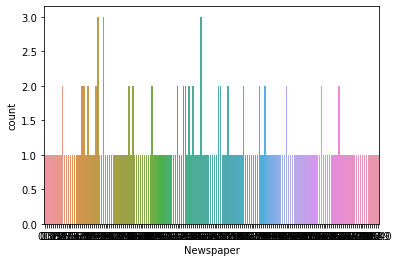

In [18]:
sns.countplot(Data['Newspaper'])

In [19]:
x=Data.drop('Sales',axis=1)
y=Data['Sales']

In [20]:
x.shape

(200, 3)

In [21]:
y.shape

(200,)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=51)

In [23]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(140, 3) (60, 3) (140,) (60,)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg=LinearRegression()
reg

LinearRegression()

In [26]:
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
reg.coef_

array([ 0.04662728,  0.18135615, -0.00267884])

In [28]:
reg.intercept_

3.0860924321227845

In [29]:
pred=reg.predict(x_test)
pred

array([12.1347038 , 20.39902878, 13.31850685, 12.21419756,  4.5469905 ,
       14.32960423, 15.42701937, 21.80939597, 12.36607058, 14.03751769,
       16.72583388,  7.15519339, 12.79409159, 11.58818665, 12.18361262,
       19.11323572, 12.34233833, 14.41964657, 22.23596146, 18.44611107,
       10.1915942 , 12.87173922, 15.24665915, 11.40250617, 20.0908842 ,
       15.01737241, 23.74920826, 16.73689945, 17.36143291, 23.46091882,
       16.56644353,  7.76310021, 16.82969347, 15.08464008,  9.8294181 ,
       15.86238987,  7.98757604,  8.99127137, 15.25543634, 21.79460545,
        3.86525612, 15.58189645, 13.22035396, 14.18594702, 16.88355369,
       14.06496112, 20.77134208, 18.23555367, 10.21186811, 12.81695762,
       14.237537  ,  7.80993308, 17.24860473,  9.49884661, 10.27712923,
       15.2181052 , 21.18529077, 17.81541106, 15.64386151, 18.24745887])

In [30]:
y_test

148    10.9
104    20.7
4      12.9
7      13.2
192     5.9
160    14.4
118    15.9
58     23.8
190    10.8
174    11.5
23     15.5
10      8.6
115    12.6
86     12.0
67     13.4
68     18.9
177    11.7
171    14.5
128    24.7
14     19.0
82     11.3
50     11.4
45     14.9
31     11.9
176    20.2
21     12.5
198    25.5
89     16.7
35     12.8
36     25.4
113    15.9
121     7.0
99     17.2
162    14.9
79     11.0
131    12.7
65      9.3
13      9.7
85     15.2
42     20.7
8       4.8
146    13.2
63     14.0
43     12.9
64     18.0
112    14.1
185    22.6
59     18.4
90     11.2
9      10.6
19     14.6
32      9.6
27     15.9
51     10.7
130     1.6
156    15.3
111    21.8
70     18.3
154    15.6
169    15.0
Name: Sales, dtype: float64

In [31]:
reg.score(x_test,y_test)

0.8614791245277719

In [33]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
print("Mean square error",mse)
print("Root mean square error",rmse)

Mean square error 3.26517213558851
Root mean square error 1.8069787313603085


In [34]:
print(r2_score(y_test,pred))

0.8614791245277719
